In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. csv 폴더에서 drinks.csv 파일 로드 
2. 결측치를 확인 
3. 결측치 continent 컬럼에 결측치 존재. -> 결측치에 값은 'OT'로 지정
4. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합을 출력
5. 이 데이터를 바 그래프 출력
6. total_litres_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력

In [3]:
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [5]:
drinks.isna().any(axis=0)

country                         False
beer_servings                   False
spirit_servings                 False
wine_servings                   False
total_litres_of_pure_alcohol    False
continent                        True
dtype: bool

In [7]:
drinks["continent"] = drinks["continent"].fillna("OT")

In [12]:
result = drinks.groupby("continent").agg(['mean', 'min', 'max', 'sum'])['spirit_servings']
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


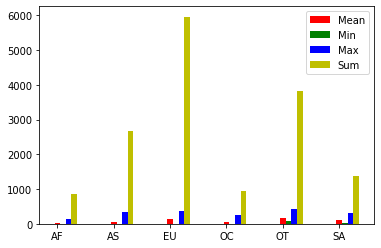

In [19]:
# result 값을 가지고 바형 그래프를 생성
import numpy as np

means = result['mean']
mins = result['min']
maxs = result['max']
sums = result['sum']
n = len(result.index)
index = np.arange(n)
bar_width = 0.1

plt.bar(index, means, bar_width, color='r', label="Mean")
plt.bar(index+bar_width, mins, bar_width, color='g', label="Min")
plt.bar(index+bar_width*2, maxs, bar_width, color='b', label="Max")
plt.bar(index+bar_width*3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()


plt.show()

In [ ]:
drinks.head()

In [21]:
total_mean = drinks["total_litres_of_pure_alcohol"].mean()
total_mean

4.717098445595855

In [23]:
continent_mean = drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

In [24]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64